## Understanding missingness in data

In [2]:
# Import libraries
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import yaml
import seaborn as sns

# Connect to database
with open('database.yaml', 'r') as f:
    db_params = yaml.safe_load(f)

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(
  host=db_params['host'],
  port=db_params['port'],
  dbname=db_params['db'],
  user=db_params['user'],
  password=db_params['pass']    
))

c:\Users\mihir\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\mihir\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\mihir\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Building Info

In [29]:
bi = pd.read_sql('select * from cleaned.building_info', engine)

# Null % for each variable
print('Percentage of nulls:')
print(bi.isnull().mean())

# Description of data
print('\n Descriptive stats for data')
bi.describe()


Percentage of nulls:
parcelid      0.0
ATTIC_SQFT    0.0
BSMT_SQFT     0.0
LIVE_FSQFT    0.0
SQFT          1.0
SQFT_FLR1     0.0
SQFT_FLR2     0.0
SQFT_FLRH     0.0
STORYHT       0.0
YEARBUILT     0.0
dtype: float64

 Descriptive stats for data


,ATTIC_SQFT,BSMT_SQFT,LIVE_FSQFT,SQFT_FLR1,SQFT_FLR2,SQFT_FLRH,STORYHT,YEARBUILT
count,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000,256031.000000
mean,88.856162,942.499904,1757.511805,1171.911843,496.001281,44.380102,1.491835,1935.660865
std,214.089893,759.669468,872.615833,546.401946,583.229466,185.501064,0.535306,192.654387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,662.000000,1199.000000,860.000000,0.000000,0.000000,1.000000,1929.000000
50%,0.000000,925.000000,1564.000000,1050.000000,24.000000,0.000000,1.500000,1957.000000
75%,0.000000,1215.000000,2110.000000,1353.000000,933.000000,0.000000,2.000000,1977.000000
max,6679.000000,47675.000000,21136.000000,11697.000000,15750.000000,6034.000000,41.750000,2020.000000


In [25]:
# Digging into cases where year built = 0
bi[bi['YEARBUILT'] == 0]
# 2440 rows where yearbuilt = 0
# Almost all of these have 0 for all values (strong correlation of missingness)

# are there any with nonzero values in other imp variables?
bi[(bi['YEARBUILT'] == 0)&(bi['LIVE_FSQFT'] > 0)]
# There are 4 rows (nonmissing live_fsqft, but zero for everything else)

bi[(bi['YEARBUILT'] == 0)&(bi['BSMT_SQFT'] > 0)]
# There are 17 rows that have nonmissing bsmt sqft (these have)

bi[(bi['YEARBUILT'] != 0)&(bi['LIVE_FSQFT'] == 0)]
# There are an additional 646 rows where year built is not 0, butl live fsqft is zero

,parcelid,ATTIC_SQFT,BSMT_SQFT,LIVE_FSQFT,SQFT,SQFT_FLR1,SQFT_FLR2,SQFT_FLRH,STORYHT,YEARBUILT
29885,6300180007300,0,1300,0,None,0,0,0,0.0,0
30038,6300250007200,0,1260,0,None,0,0,0,0.0,0
46065,5100150000800,0,844,0,None,0,0,0,0.0,0
55075,5900203011900,0,2016,0,None,0,0,0,0.0,0
75689,5000230001100,0,29492,0,None,0,0,0,0.0,0
84998,5600030019200,0,832,0,None,0,0,0,0.0,0
86472,5700150009400,0,3105,0,None,0,0,0,0.0,0
103757,1810003001490,0,850,0,None,0,0,0,0.0,0
113722,5400062003700,0,794,0,None,0,0,0,0.0,0
125771,6030A23002300,0,1878,0,None,0,0,0,0.0,0


### Property Transfers

In [ ]:
pt = pd.read_sql('select * from cleaned.property_transfer', engine)

In [36]:
# Null % for each variable
print('Percentage of nulls:')
print(pt.drop(['book', 'plat', 'parcel', 'multi_owner', 'property_no'], axis=1).isnull().mean())

# Description of data
print('\n Descriptive stats for numeric data')

pd.set_option('display.float_format', lambda x: '%.5f' % x)

pt.describe()

Percentage of nulls:
tax_district        0.000000
owner_name_1        0.000015
owner_name_2        0.513467
land_value          0.028928
building_value      0.028928
property_class      0.000000
house_no            0.025737
street_name         0.002332
street_suffix       0.009853
zip_code            0.370335
month_of_sale       0.000000
day_of_sale         0.000000
year_of_sale        0.000000
num_parcels_sold    0.000002
sale_price          0.000000
valid_sale          0.000000
conveyance_no       0.002829
deed_type           0.000110
appraisal_area      0.370378
prior_owner         0.370335
property_no         0.370337
parcelid            0.000000
is_new              0.000000
date_of_sale        0.000000
dtype: float64

 Descriptive stats for data


,land_value,building_value,sale_price,is_new
count,504309.00000,504309.00000,519332.00000,519332.00000
mean,46667.91428,121029.30656,260083.88887,0.02893
std,219553.83511,655001.61581,1723998.86083,0.16760
min,0.00000,0.00000,1.00000,0.00000
25%,13800.00000,39200.00000,66600.00000,0.00000
50%,21800.00000,73000.00000,120000.00000,0.00000
75%,36400.00000,116300.00000,210000.00000,0.00000
max,48430540.00000,165218900.00000,218201000.00000,1.00000


<AxesSubplot:xlabel='date_of_sale', ylabel='Count'>

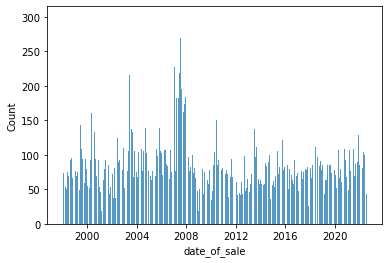

In [39]:
sns.histplot(pt['date_of_sale'])

In [53]:
# Distribution of number of sales by parcelid 
sale_counts = pt.groupby('parcelid')['date_of_sale'].count()

sale_counts.describe()

count   236429.00000
mean         2.19657
std          2.06120
min          1.00000
25%          1.00000
50%          2.00000
75%          3.00000
max        699.00000
Name: date_of_sale, dtype: float64

In [55]:
print('\n Top 5 zip codes for sales')

print(pt['zip_code'].value_counts()[0:6,])

print('\n Bottom 5 zip codes for sales')
print(pt['zip_code'].value_counts()[-5:,])



 Top 5 zip codes for sales
00000-0000    53514
45205-0000     5579
45211-0000     5386
45231-0000     5044
45238-0000     4433
45215-0000     4408
Name: zip_code, dtype: int64

 Bottom 5 zip codes for sales
45243-2306    1
45225-2023    1
45230-4122    1
45243-3014    1
45224-2908    1
Name: zip_code, dtype: int64


In [56]:
pt['property_class'].value_counts()
# 510 is single family dwelling

510    328638
500     55901
550     37854
520     26966
401     13397
        ...  
407         1
428         1
467         1
451         1
660         1
Name: property_class, Length: 143, dtype: int64

### Monthly Tax

In [57]:
mt = pd.read_sql('select * from cleaned.monthly_tax', engine)

In [58]:
# Null % for each variable
print('Percentage of nulls:')
print(mt.isnull().mean())

# Description of data
print('\n Descriptive stats for numeric data')

pd.set_option('display.float_format', lambda x: '%.5f' % x)

mt.describe()

Percentage of nulls:
parcelid                0.00000
2_5_flag                0.00000
homestead_flag          0.00000
book                    0.00000
page                    0.00000
                          ...  
annual_taxes            0.08237
annual_taxes_paid       0.08237
delinquent_taxes        0.01352
delinquent_taxes_paid   0.01352
active_flag             0.00000
Length: 62, dtype: float64

 Descriptive stats for numeric data


,book,mltown,prop_class_code,appraisal_area,tax_district,deeded_acreage,sale_amount,num_parcels,sale_source,ag_use,market_land_value,market_impr_value,total_market_value,annual_taxes,annual_taxes_paid,delinquent_taxes,delinquent_taxes_paid
count,353973.00000,353973.00000,353973.00000,353711.00000,353973.00000,353973.00000,302538.00000,350659.00000,101815.00000,353973.00000,351339.00000,351339.00000,351339.00000,324815.00000,324815.00000,349186.00000,349186.00000
mean,414.29742,3.99893,513.28860,49041.24421,87.95686,0.70638,167687.79765,3.58672,209725.28227,173.36031,57445.21389,186902.36793,244347.58182,5507.90332,5341.34554,211.88313,106.52509
std,215.53976,18.54434,58.96647,79799.36705,83.46557,5.48821,1025587.58898,24.18731,104144.48974,7365.46212,280713.78682,3099339.64346,3184371.26928,103010.59441,102076.21635,10298.68413,9593.33292
min,1.00000,0.00000,100.00000,100.00000,1.00000,0.00000,0.00000,1.00000,1997.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-4317657.70000,-4317657.70000
25%,194.00000,0.00000,510.00000,3700.00000,1.00000,0.10400,0.00000,1.00000,124288.00000,0.00000,14100.00000,24170.00000,47750.00000,1358.92500,1233.10500,0.00000,0.00000
50%,525.00000,0.00000,510.00000,52506.00000,68.00000,0.18130,79100.00000,1.00000,223962.00000,0.00000,26330.00000,83640.00000,114000.00000,2667.76000,2601.65000,0.00000,0.00000
75%,590.00000,0.00000,510.00000,59201.00000,163.00000,0.38100,176000.00000,1.00000,301349.50000,0.00000,48990.00000,157500.00000,210795.00000,4804.85500,4728.92500,0.00000,0.00000
max,671.00000,90.00000,881.00000,550186.00000,241.00000,1059.01000,134000000.00000,466.00000,363807.00000,1865000.00000,53979960.00000,1388727510.00000,1388727510.00000,53077165.60000,53077165.60000,1069602.42000,884991.85000


### Historic Sales

In [60]:
hs = pd.read_sql('select * from cleaned.historic_sales', engine)

In [64]:
# Null % for each variable
print('Percentage of nulls:')
print(hs[['sale_price', 'transfer_type', 'style', 'grade', 'exterior_wall_type', 'basement', 'heating', 'air_conditioning',
       'total_rooms', 'full_bath', 'half_bath', 'fireplaces', 'garage_type',
       'garage_capacity', 'num_stories', 'year_built', 'finished_sq_ft',
       'total_finish_area', 'first_floor_area', 'half_floor_area',
       'finished_basement']].isnull().mean())

# Description of data
print('\n Descriptive stats for numeric data')

pd.set_option('display.float_format', lambda x: '%.5f' % x)

hs.describe()

Percentage of nulls:
sale_price           0.13786
transfer_type        0.00741
style                0.15582
grade                0.14598
exterior_wall_type   0.15576
basement             0.27901
heating              0.14595
air_conditioning     0.14595
total_rooms          0.14595
full_bath            0.14595
half_bath            0.14595
fireplaces           0.14595
garage_type          0.33333
garage_capacity      0.00000
num_stories          0.14595
year_built           0.14611
finished_sq_ft       0.14595
total_finish_area    0.14595
first_floor_area     0.14595
half_floor_area      0.14595
finished_basement    0.14595
dtype: float64

 Descriptive stats for numeric data


,use_code,number_of_parcels,conveyance_number,appraisal_area,total_sales_records,sale_price,subdivision,tax_year,total_rooms,full_bath,half_bath,fireplaces,garage_capacity,num_stories,year_built,finished_sq_ft,total_finish_area,first_floor_area,half_floor_area,finished_basement
count,295695.00000,293529.00000,260976.00000,295611.00000,293529.00000,254931.00000,295695.00000,295695.00000,252539.00000,252539.00000,252539.00000,252539.00000,295695.00000,252539.00000,252491.00000,252539.00000,252539.00000,252539.00000,252539.00000,252539.00000
mean,511.50496,3.67568,111578.10961,53086.73557,1.05417,134728.55136,3.10711,2021.00000,6.59007,1.68050,0.48231,0.52702,234.12802,1.44963,1937.14843,1321.04812,1755.31874,1172.11366,493.95325,156.85013
std,29.39828,26.20293,104761.40539,85016.39834,0.27596,233266.92757,229.90181,0.00000,2.02327,0.78631,0.58994,0.67609,286.63504,0.53780,186.65469,833.55594,861.89981,543.64843,578.78573,360.74230
min,100.00000,1.00000,0.00000,100.00000,1.00000,0.00000,0.00000,2021.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,510.00000,1.00000,8485.75000,4202.00000,1.00000,0.00000,0.00000,2021.00000,5.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1930.00000,884.00000,1200.00000,861.00000,0.00000,0.00000
50%,510.00000,1.00000,84118.00000,53007.00000,1.00000,89900.00000,0.00000,2021.00000,6.00000,2.00000,0.00000,0.00000,200.00000,1.00000,1957.00000,1102.00000,1564.00000,1050.00000,0.00000,0.00000
75%,510.00000,1.00000,210928.25000,59209.00000,1.00000,178000.00000,0.00000,2021.00000,8.00000,2.00000,1.00000,1.00000,440.00000,2.00000,1977.00000,1499.00000,2107.00000,1352.00000,930.00000,0.00000
max,599.00000,466.00000,688982.00000,550186.00000,29.00000,18950000.00000,17014.00000,2021.00000,96.00000,12.00000,20.00000,10.00000,8521.00000,11.00000,2020.00000,27072.00000,21136.00000,11697.00000,15750.00000,9548.00000


In [67]:
missing_deets = hs[hs['air_conditioning'].isna()]

missing_deets

,parcelid,use_code,number_of_parcels,conveyance_number,owner_name_1,owner_name_2,owner_address_1,owner_address_2,date_of_sale,instrument_type,...,fireplaces,garage_type,garage_capacity,num_stories,year_built,finished_sq_ft,total_finish_area,first_floor_area,half_floor_area,finished_basement
13,5500242002100,500,2.00000,42653.00000,SCHILL WILLIAM C JR,None,3481 EBENEZER RD,"CINCINNATI, OH, 45248",2012-11-15,WD - Warranty Deed (Conv),...,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,5500242004400,500,1.00000,NaN,BRENNER & JANSEN PROPERTIES INC,None,PO BOX 36008,"CINCINNATI, OH, 45236",2004-08-24,AD - Auditors Deed (EX),...,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,5500242009900,500,2.00000,20158.00000,SEM,None,3452 MIRROR LN,"CINCINNATI, OH, 45248",2011-05-03,WD - Warranty Deed (Conv),...,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,5500242012300,500,2.00000,2673.00000,THOMPSON PATRICIA K,None,3482 WESTPORT CT,"CINCINNATI, OH, 45248",1993-03-05,WE - Warranty Deed (EX),...,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,5500242014300,500,5.00000,NaN,E-M&M LTD,None,6386 BRIDGETOWN RD,"CINCINNATI, OH, 45248",2005-12-21,WE - Warranty Deed (EX),...,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295684,5500241028700,508,1.00000,116099.00000,GREEN TOWNSHIP HAMILTON COUNTY,BOARD OF TRS,6303 HARRISON AVE,"CINCINNATI, OH, 45247",2016-07-22,WE - Warranty Deed (EX),...,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295686,5500241028900,508,NaN,NaN,GREEN TOWNSHIP HAMILTON OHIO BOARD,OF TRUSTEES,6303 HARRISON AVE,"CINCINNATI, OH, 45247",NaT,None,...,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295688,5500241029100,508,1.00000,120211.00000,GREEN TOWNSHIP HAMILTON COUNTY OHIO,BOARD OF TRUSTEES,6303 HARRISON AVE,"CINCINNATI, OH, 45247",2016-09-08,WE - Warranty Deed (EX),...,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295690,5500241029300,508,1.00000,122784.00000,GREEN TOWNSHIP HAMILTON COUNTY OHIO,BOARD OF TRUSTEES,6303 HARRISON AVE,"CINCINNATI, OH, 45247",2016-10-07,WE - Warranty Deed (EX),...,NaN,None,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
missing_deets['use_code'].value_counts()

500    30937
508     8616
501     1609
556      449
510      434
111      266
112      124
116      115
122      100
560       88
121       58
588       55
599       47
199       42
124       36
520       35
507       32
555       22
502       19
530       18
550       13
505        7
503        6
504        5
115        5
114        5
110        5
120        2
113        2
100        2
517        1
552        1
Name: use_code, dtype: int64

In [69]:
hs['use_code'].value_counts()

510    213004
500     30993
550     20305
520     11439
508      8617
555      3058
530      1894
501      1619
552      1417
599      1041
111       474
556       454
112       257
116       162
551       141
122       124
560       122
121       114
199        84
124        61
588        55
553        48
517        35
507        34
569        25
554        20
502        19
557        17
558         9
115         9
110         8
505         7
114         6
503         6
504         5
113         3
120         2
100         2
513         1
106         1
101         1
521         1
511         1
Name: use_code, dtype: int64